In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 导入数据，对数据集进行基础认知

In [2]:
data = pd.read_csv('California Housing Prices/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 数据清洗

In [4]:
# 通过观察，total_bedrooms存在200左右的缺失值，观察该列情况
data['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [5]:
# 选择丢失该列为空值的行，避免引入噪音
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# 转换ocean_proximity列的Dtype，便于后续特征分析
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [8]:
# 五个特征值，使用独热编码（One-Hot Encoding）进行转换
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [9]:
# 数据整理完成，随机打乱整体次序
data = data.sample(n=len(data), random_state=1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,True,False,False,False,False
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,True,False,False,False,False
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,True,False,False,False,False
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,False,False,False,False,True
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,True,False,False,False,False
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,False,False,False,False,True
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,True,False,False,False,False
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,False,True,False,False,False


In [10]:
# 移动列名，将median_house_value移动到第一列，方便观察
median_house_value = 'median_house_value'
all_columns = list(data.columns)
all_columns.remove(median_house_value)

new_column_list = [median_house_value] + all_columns

data_new = data[new_column_list]
data_new

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,360900.0,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,True,False,False,False,False
4121,291500.0,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,True,False,False,False,False
15433,131300.0,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,True,False,False,False,False
20272,500001.0,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,False,False,False,False,True
11843,118800.0,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,190300.0,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,True,False,False,False,False
17455,125800.0,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,False,False,False,False,True
5249,500001.0,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,True,False,False,False,False
12290,91200.0,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,False,True,False,False,False


## 观察数据特征

<Axes: >

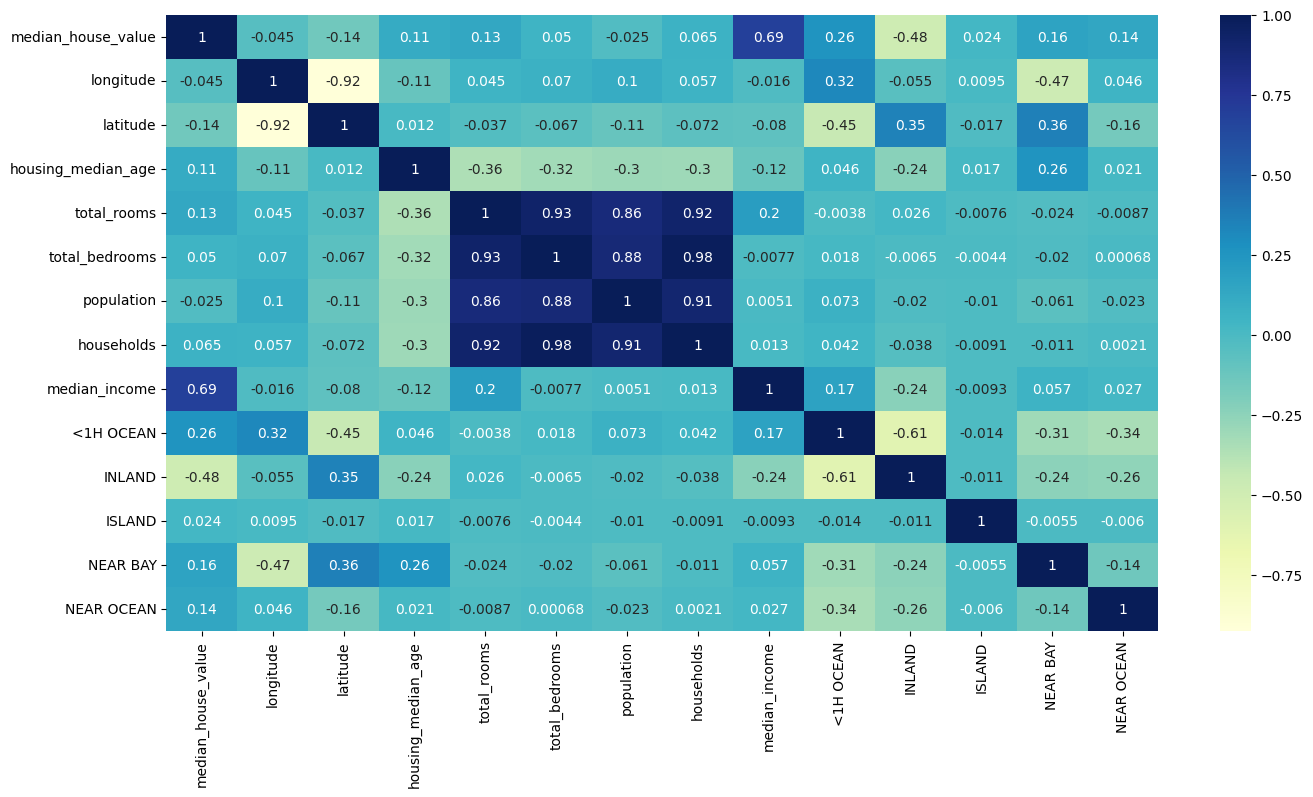

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(data_new.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

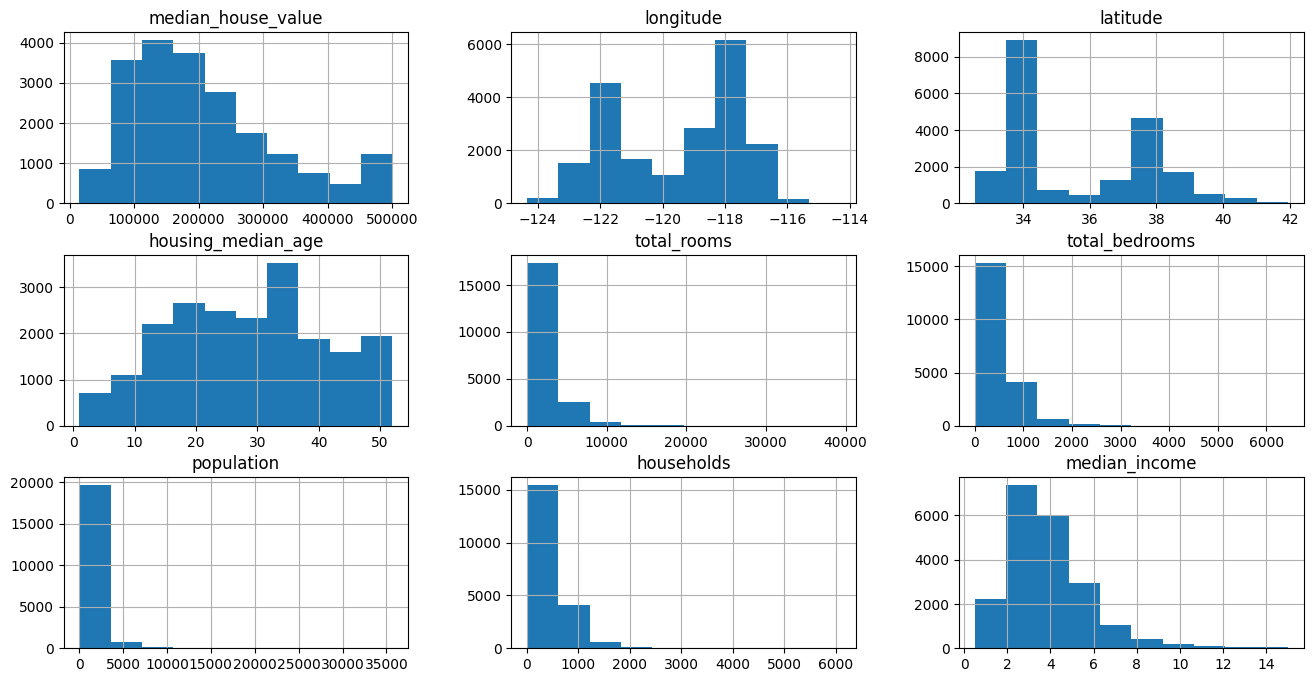

In [12]:
# 每个特征值的直方图，观察分布情况，
data_new.hist(figsize=(16,8))

array([[<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

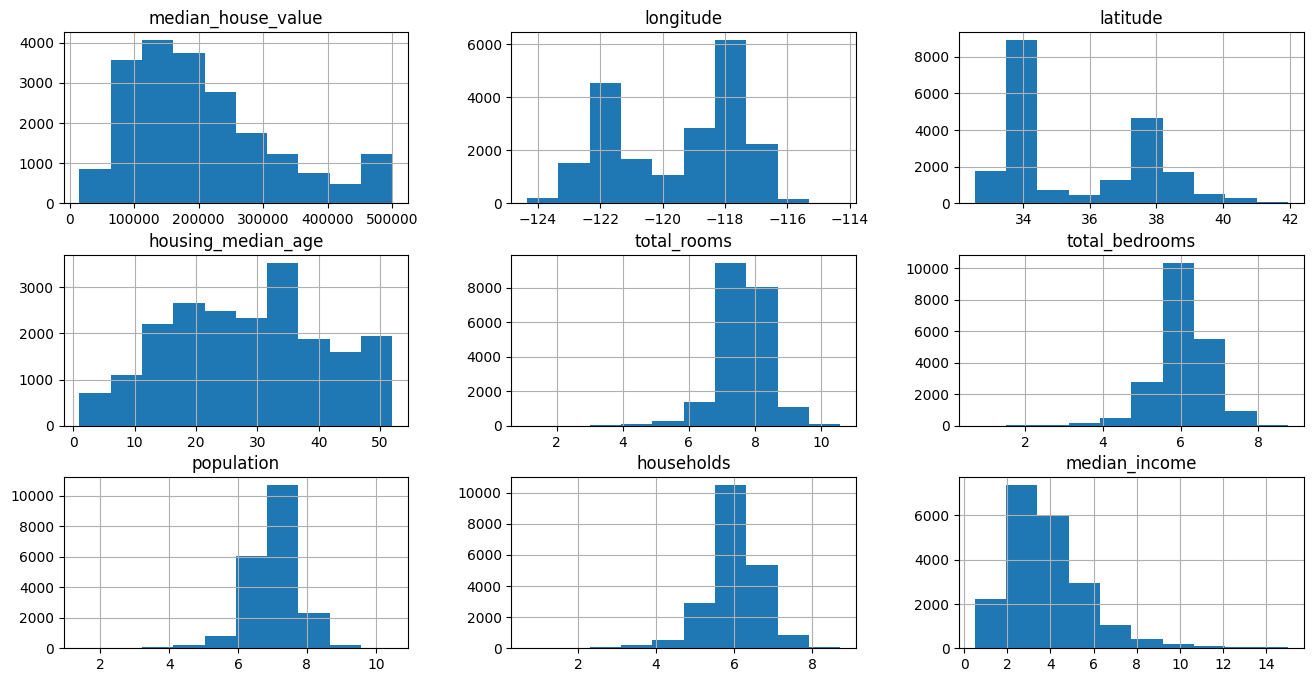

In [13]:
# 对不符合正态分布的数据进行对数转换
data_new['total_rooms'] = np.log(data_new['total_rooms'] + 1)
data_new['total_bedrooms'] = np.log(data_new['total_bedrooms'] + 1)
data_new['population'] = np.log(data_new['population'] + 1)
data_new['households'] = np.log(data_new['households'] + 1)

data_new.hist(figsize=(16,8))

<Axes: xlabel='latitude', ylabel='longitude'>

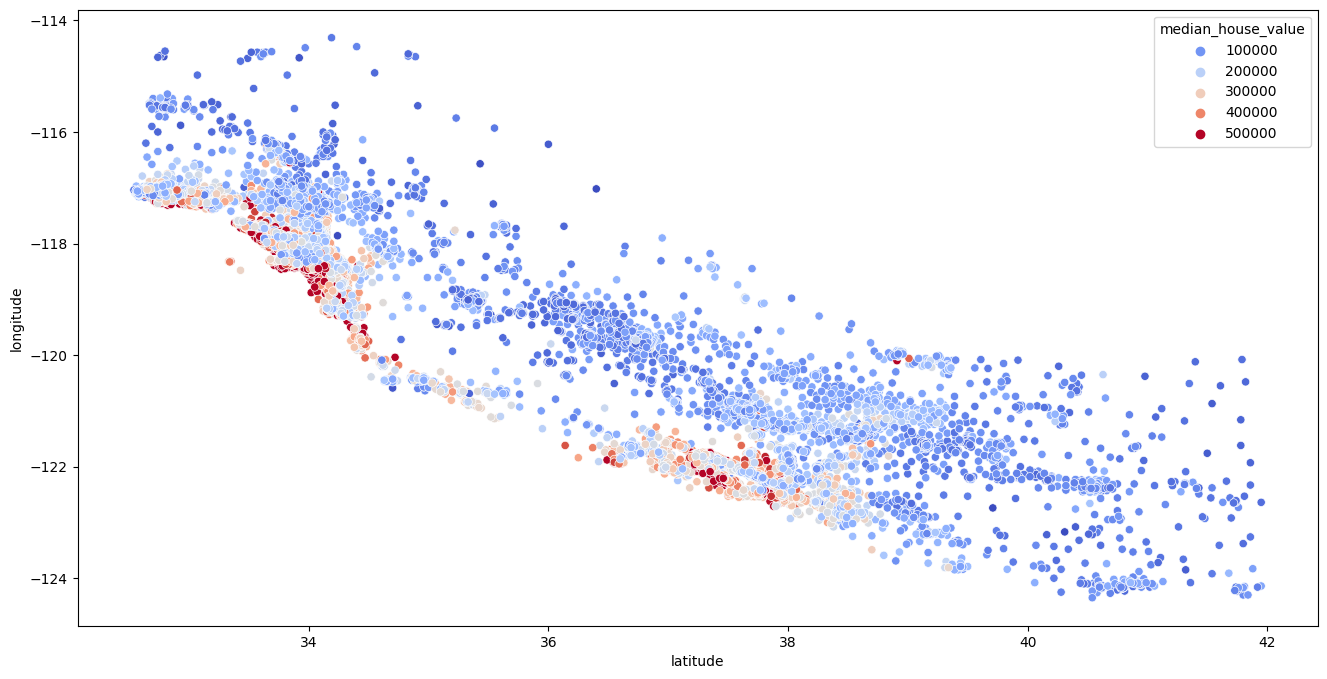

In [15]:
# 通过经纬度探索房价，可以画出海岸线；分开影响因素不大，但是合并影响很大
plt.figure(figsize=(16,8))
sns.scatterplot(x='latitude', y='longitude', data=data_new, hue='median_house_value', palette='coolwarm')

<Axes: >

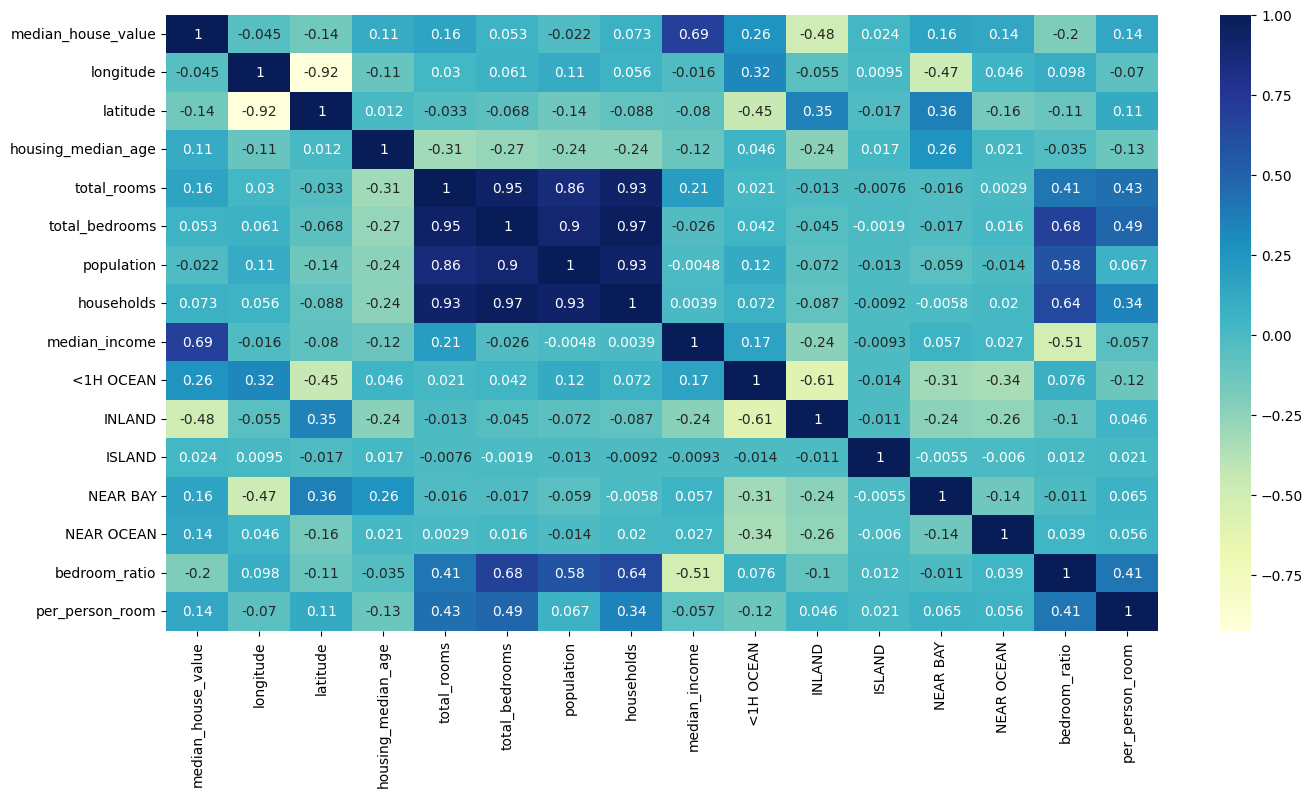

In [16]:
# 添加合并特征，探索数据
data_new['bedroom_ratio'] = data_new['total_bedrooms'] / data_new['total_rooms']
data_new['per_person_room'] = data_new['total_bedrooms'] / data_new['population']

plt.figure(figsize=(16,8))
sns.heatmap(data_new.corr(), annot=True, cmap='YlGnBu')

## 划分数据集 -- 训练+测试

In [32]:
from sklearn.model_selection import train_test_split

X = data_new.drop(['median_house_value'], axis=1)
y = data_new['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16346, 15), (16346,), (4087, 15), (4087,))

## 使用线性回归建模

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 测试模型

In [34]:
reg.score(X_test, y_test)

0.6467741133191287

## 使用随机森林建模

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test, y_test)

0.8092431600784211

## 交叉验证

In [27]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
             'min_samples_split': [2,4],
             'max_depth': [None, 4]}

grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.score(X_test, y_test)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


0.8058027959836938

# 根据得分，重新归纳特征进行建模预测

<Axes: >

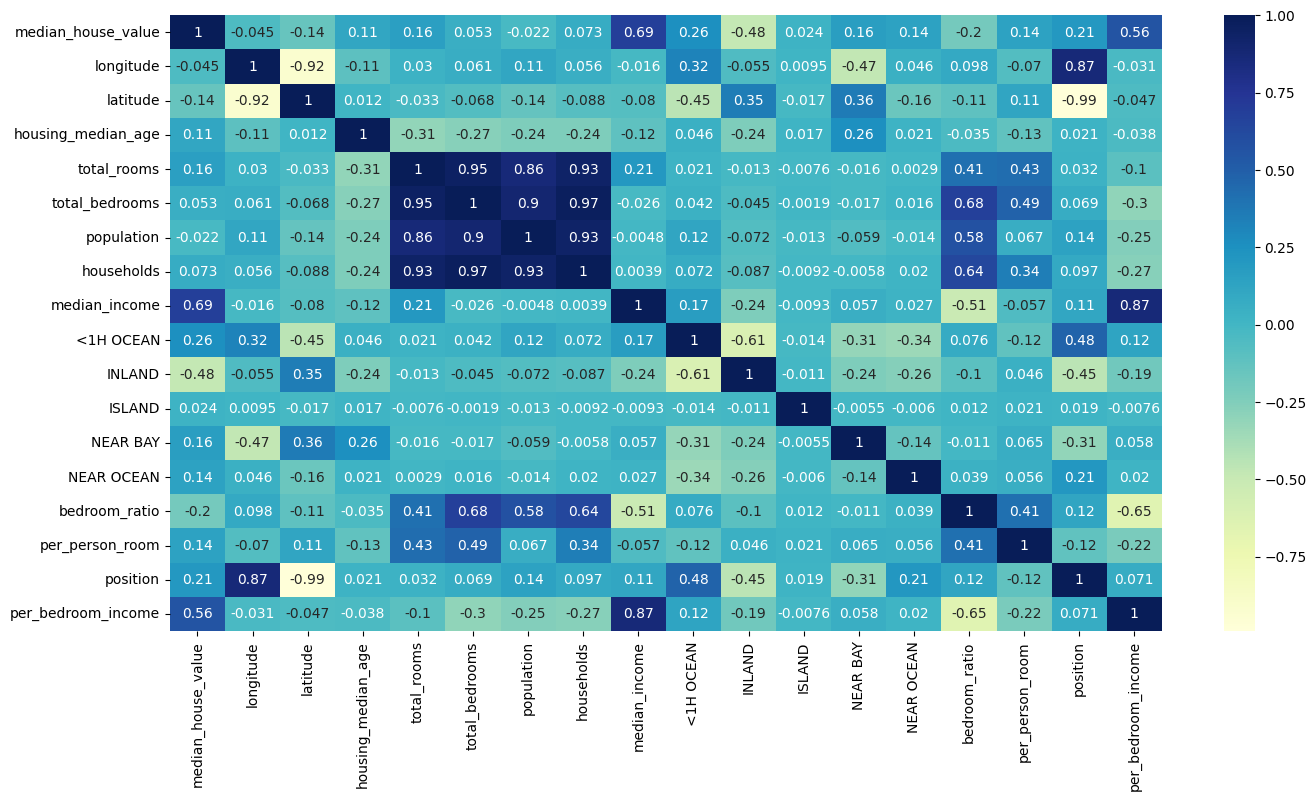

In [31]:
# 测试新特征
data_new_test = data_new.copy()

data_new_test['position'] = np.log((data_new_test['longitude']**2 / data_new_test['latitude']**2) + 1)
data_new_test['per_bedroom_income'] = data_new_test['median_income'] / data_new_test['total_bedrooms']

plt.figure(figsize=(16,8))
sns.heatmap(data_new_test.corr(), annot=True, cmap='YlGnBu')

In [37]:
from sklearn.model_selection import train_test_split

X = data_new_test.drop(['median_house_value'], axis=1)
y = data_new_test['median_house_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train2, y_train2)

reg.score(X_test2, y_test2)

0.6635410861263286

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train2, y_train2)

forest.score(X_test2, y_test2)

0.8180985413763475

# 通过对原始数据的探索，简单计算增加模型的特征列，使模型训练更加准确，最终达到81.8%的准确度